In [ ]:
!pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 86.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.9 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252704 sha256=cdbe392ec

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#Clustering algorithm
from sklearn.cluster import KMeans
#Visualizing the Cluster
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
import seaborn as sns
#Training-Testing and Evaluation Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
#Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
#Logistic Regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df=pd.read_csv("/content/data-final.csv",sep='\t')
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4,1,5,2,5,1,5,2,4,1,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6.0,1.0,GB,51.5448,0.1991
1,3,5,3,4,3,3,2,5,1,5,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11.0,1.0,MY,3.1698,101.706
2,2,3,4,4,3,2,1,3,2,5,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7.0,1.0,GB,54.9119,-1.3833
3,2,2,2,3,4,2,2,4,1,4,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7.0,1.0,GB,51.75,-1.25
4,3,3,3,3,5,3,3,5,3,4,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17.0,2.0,KE,1.0,38.0


In [ ]:
df.shape

(12774, 110)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12774 entries, 0 to 12773
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(75), int64(31), object(4)
memory usage: 10.7+ MB


checking For Missing Values

In [ ]:
df.isnull().sum()

EXT1                     0
EXT2                     0
EXT3                     0
EXT4                     0
EXT5                     0
                        ..
endelapse                1
IPC                      1
country                  4
lat_appx_lots_of_err     1
long_appx_lots_of_err    1
Length: 110, dtype: int64

In [ ]:
df.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object', length=110)

EDA Report

In [ ]:
from dataprep.eda import create_report
report = create_report(df)
report.save('eda_report.html')

Computing mean_agg-aggregate-mean_chunk-sub-sum-sum-aggregate-truediv-7634c6338b940c61ab83dab8fe53f235:   2%|▏         | 356/20741 [00:03<01:41, 201.69it/s]/usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: Th

Report has been saved to eda_report.html!


Drooping Missing values because most of the Missing Values Is in last 50 Columns. Last  columns are not considering.hence dropping the missing values.

In [ ]:
df=df.dropna()

In [ ]:
df.shape

(12770, 110)

In [ ]:
for col in df.columns:
    print(col)

EXT1
EXT2
EXT3
EXT4
EXT5
EXT6
EXT7
EXT8
EXT9
EXT10
EST1
EST2
EST3
EST4
EST5
EST6
EST7
EST8
EST9
EST10
AGR1
AGR2
AGR3
AGR4
AGR5
AGR6
AGR7
AGR8
AGR9
AGR10
CSN1
CSN2
CSN3
CSN4
CSN5
CSN6
CSN7
CSN8
CSN9
CSN10
OPN1
OPN2
OPN3
OPN4
OPN5
OPN6
OPN7
OPN8
OPN9
OPN10
EXT1_E
EXT2_E
EXT3_E
EXT4_E
EXT5_E
EXT6_E
EXT7_E
EXT8_E
EXT9_E
EXT10_E
EST1_E
EST2_E
EST3_E
EST4_E
EST5_E
EST6_E
EST7_E
EST8_E
EST9_E
EST10_E
AGR1_E
AGR2_E
AGR3_E
AGR4_E
AGR5_E
AGR6_E
AGR7_E
AGR8_E
AGR9_E
AGR10_E
CSN1_E
CSN2_E
CSN3_E
CSN4_E
CSN5_E
CSN6_E
CSN7_E
CSN8_E
CSN9_E
CSN10_E
OPN1_E
OPN2_E
OPN3_E
OPN4_E
OPN5_E
OPN6_E
OPN7_E
OPN8_E
OPN9_E
OPN10_E
dateload
screenw
screenh
introelapse
testelapse
endelapse
IPC
country
lat_appx_lots_of_err
long_appx_lots_of_err


plotting bar graph to check the no of people in each model.

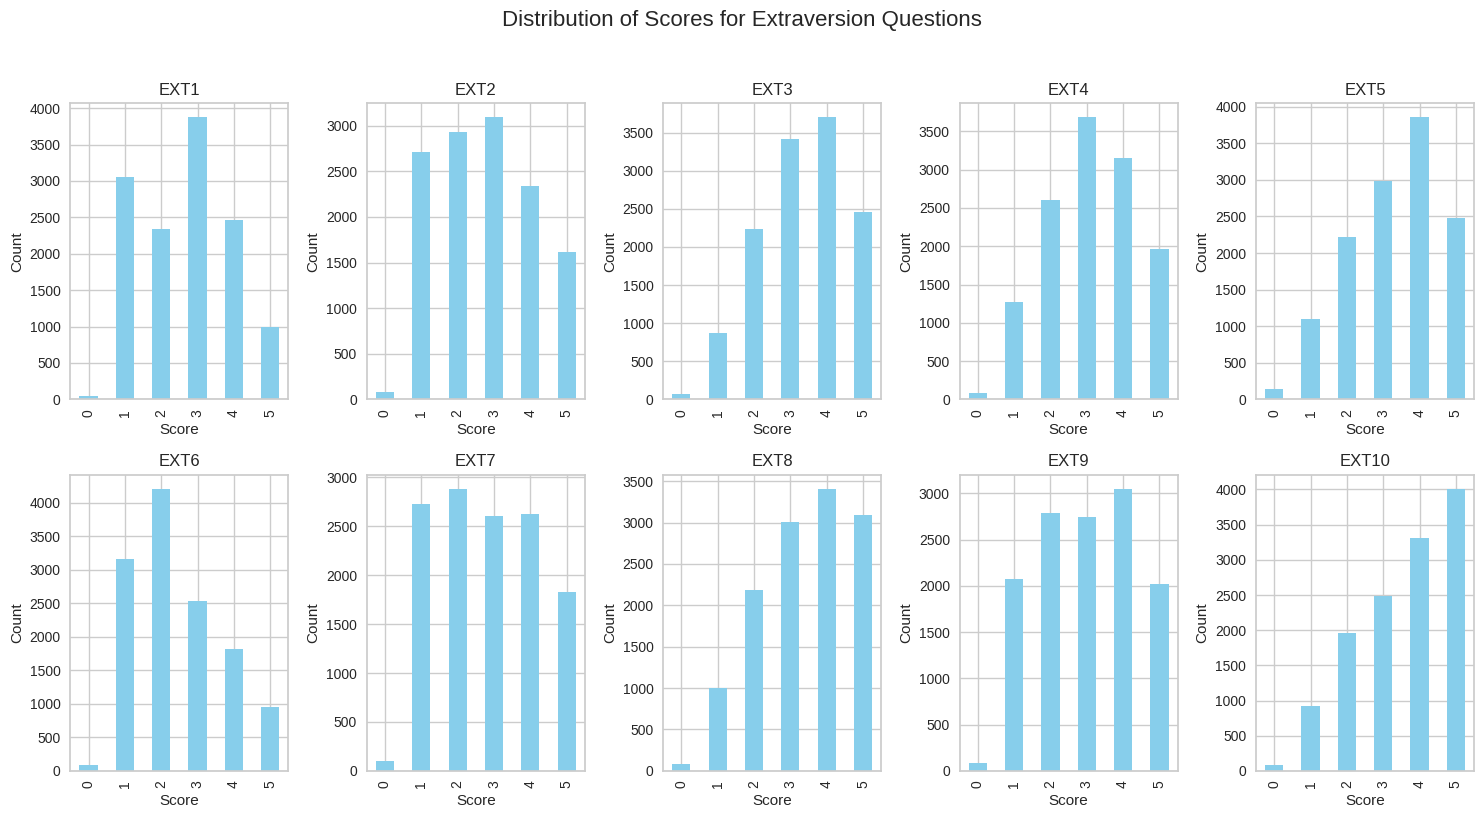

In [ ]:
extraversion_columns = df.columns[:10]
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
axes = axes.flatten()

for i, column in enumerate(extraversion_columns):
    ax = axes[i]
    df[column].value_counts().sort_index().plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(column)
    ax.set_xlabel('Score')
    ax.set_ylabel('Count')

plt.suptitle('Distribution of Scores for Extraversion Questions', y=1.02, fontsize=16)

plt.tight_layout()
plt.show()

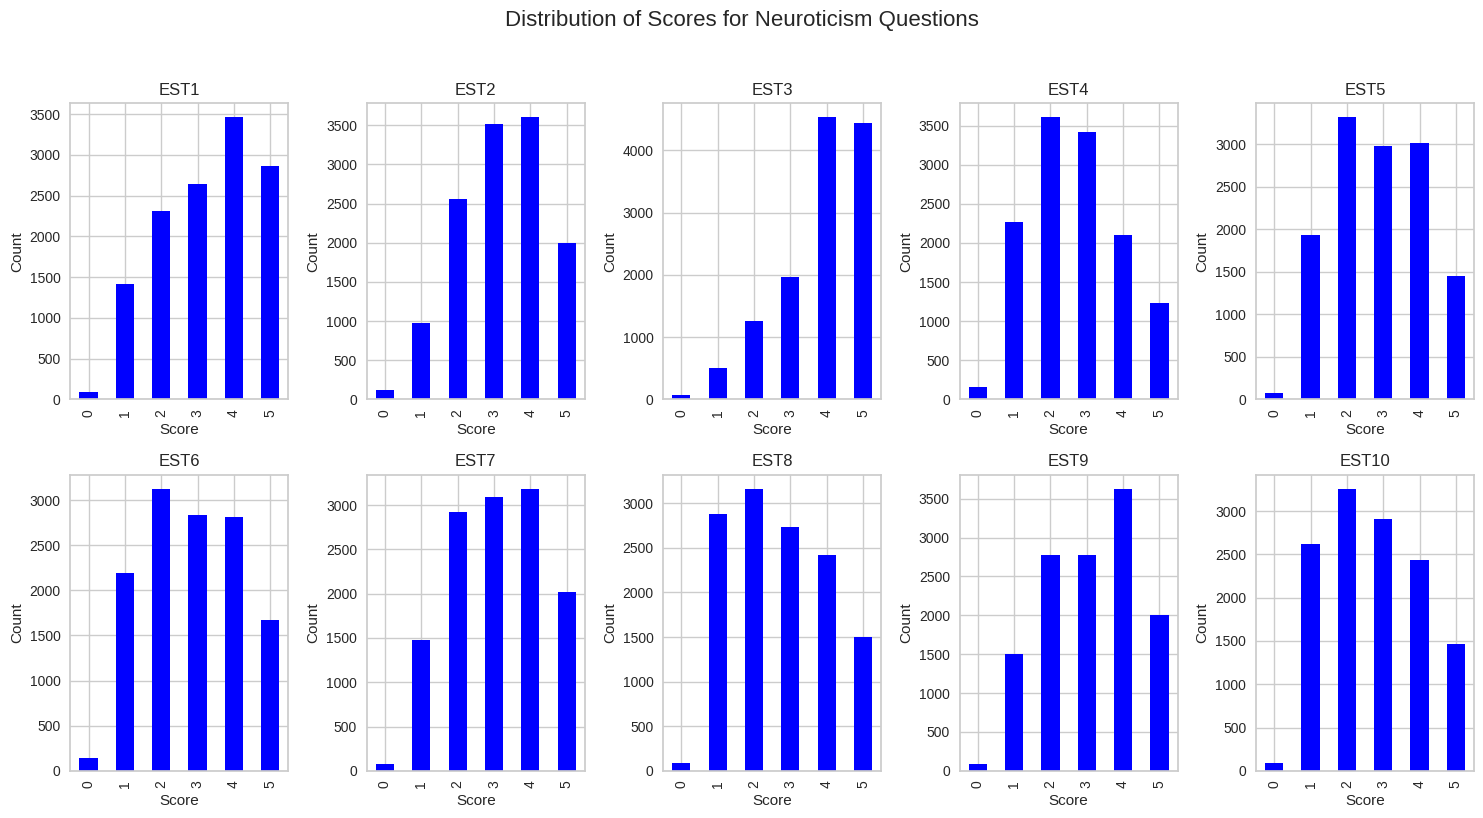

In [ ]:
neuroticism_columns = df.columns[10:20]
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
axes = axes.flatten()

for i, column in enumerate(neuroticism_columns):
    ax = axes[i]
    df[column].value_counts().sort_index().plot(kind='bar', ax=ax, color='blue')
    ax.set_title(column)
    ax.set_xlabel('Score')
    ax.set_ylabel('Count')

plt.suptitle('Distribution of Scores for Neuroticism Questions', y=1.02, fontsize=16)

plt.tight_layout()
plt.show()

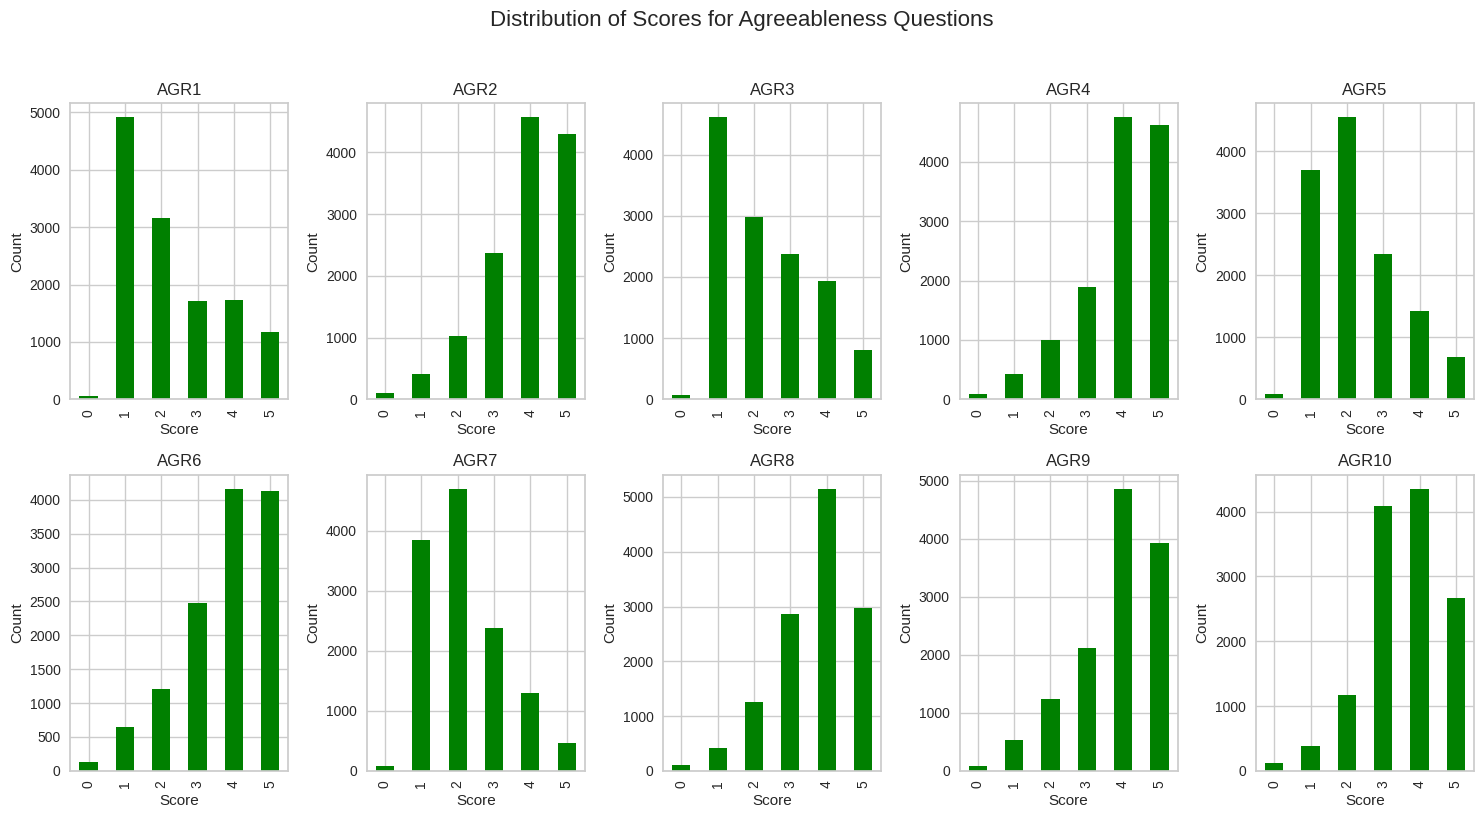

In [ ]:
agreeableness_columns = df.columns[20:30]
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
axes = axes.flatten()

for i, column in enumerate(agreeableness_columns):
    ax = axes[i]
    df[column].value_counts().sort_index().plot(kind='bar', ax=ax, color='green')
    ax.set_title(column)
    ax.set_xlabel('Score')
    ax.set_ylabel('Count')

plt.suptitle('Distribution of Scores for Agreeableness Questions', y=1.02, fontsize=16)

plt.tight_layout()
plt.show()

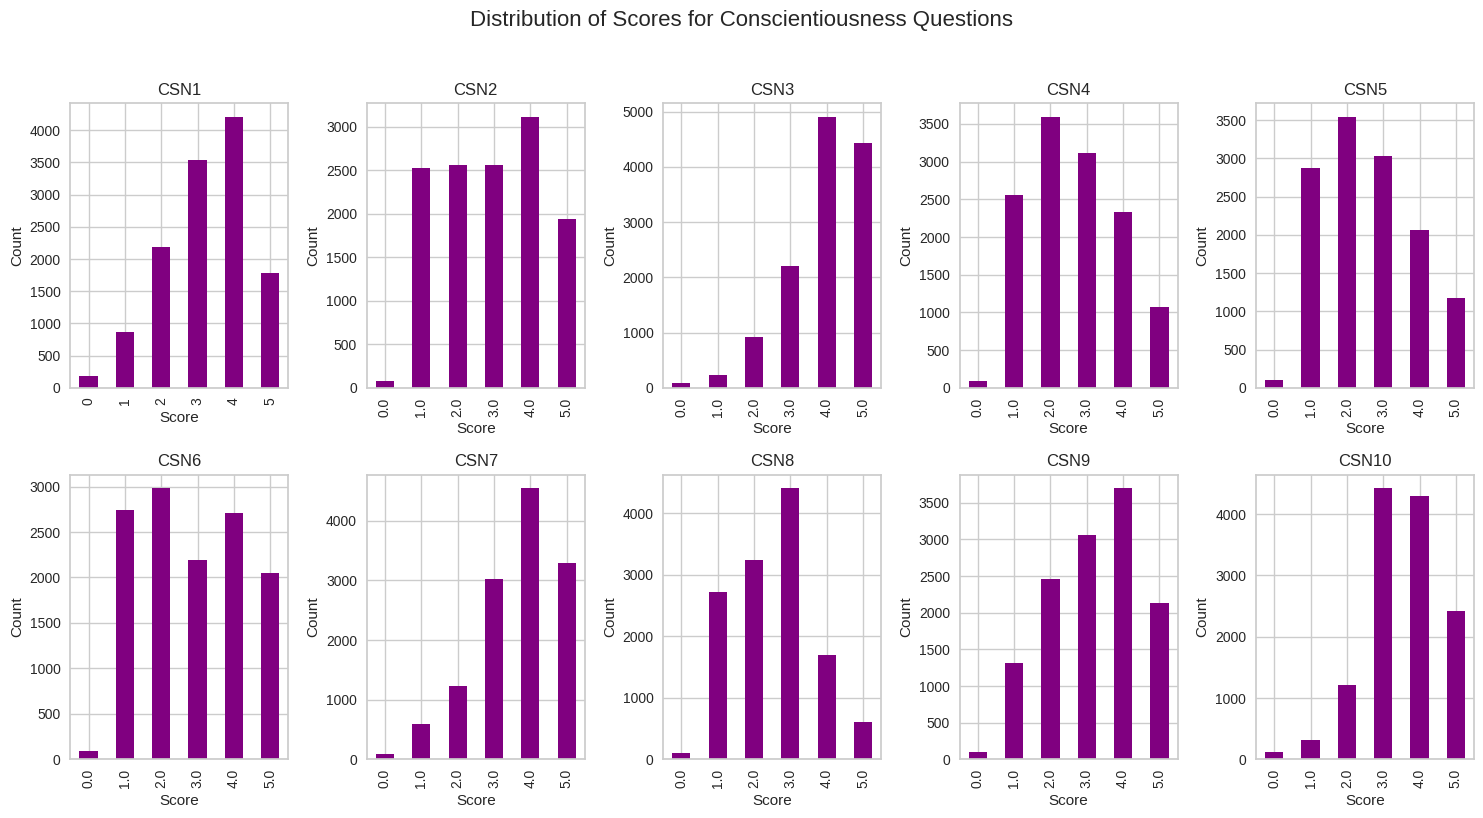

In [ ]:
conscient_columns = df.columns[30:40]
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
axes = axes.flatten()

for i, column in enumerate(conscient_columns):
    ax = axes[i]
    df[column].value_counts().sort_index().plot(kind='bar', ax=ax, color='purple')
    ax.set_title(column)
    ax.set_xlabel('Score')
    ax.set_ylabel('Count')

plt.suptitle('Distribution of Scores for Conscientiousness Questions', y=1.02, fontsize=16)

plt.tight_layout()
plt.show()

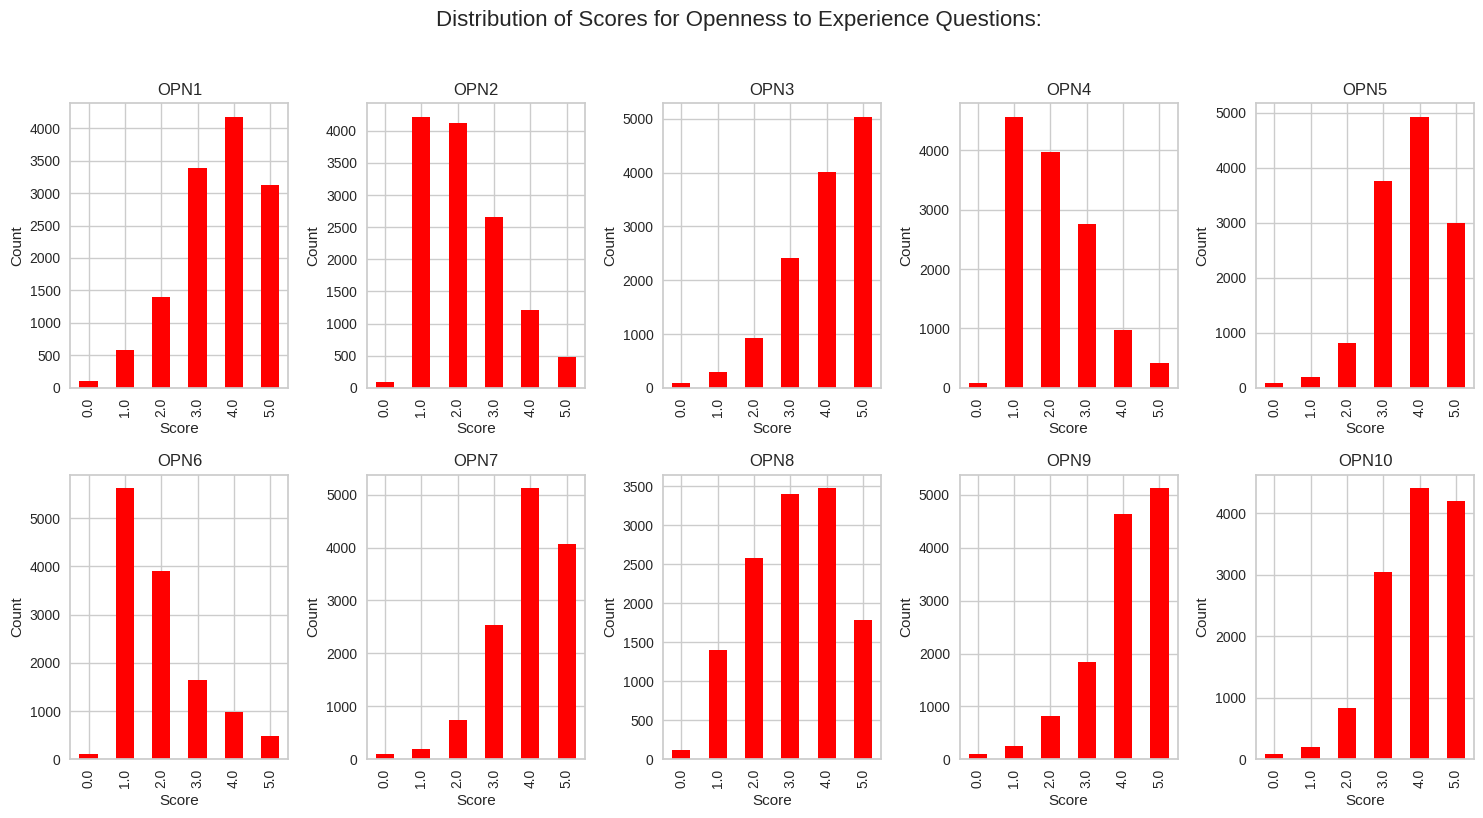

In [ ]:
openness_columns = df.columns[40:50]
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
axes = axes.flatten()

for i, column in enumerate(openness_columns):
    ax = axes[i]
    df[column].value_counts().sort_index().plot(kind='bar', ax=ax, color='red')
    ax.set_title(column)
    ax.set_xlabel('Score')
    ax.set_ylabel('Count')

plt.suptitle('Distribution of Scores for Openness to Experience Questions: ', y=1.02, fontsize=16)

plt.tight_layout()
plt.show()

Taking 0-50 columns for further processing.

In [ ]:
data = df.iloc[:, 0:50]
data.dtypes
#1-50 columns taken

EXT1       int64
EXT2       int64
EXT3       int64
EXT4       int64
EXT5       int64
EXT6       int64
EXT7       int64
EXT8       int64
EXT9       int64
EXT10      int64
EST1       int64
EST2       int64
EST3       int64
EST4       int64
EST5       int64
EST6       int64
EST7       int64
EST8       int64
EST9       int64
EST10      int64
AGR1       int64
AGR2       int64
AGR3       int64
AGR4       int64
AGR5       int64
AGR6       int64
AGR7       int64
AGR8       int64
AGR9       int64
AGR10      int64
CSN1       int64
CSN2     float64
CSN3     float64
CSN4     float64
CSN5     float64
CSN6     float64
CSN7     float64
CSN8     float64
CSN9     float64
CSN10    float64
OPN1     float64
OPN2     float64
OPN3     float64
OPN4     float64
OPN5     float64
OPN6     float64
OPN7     float64
OPN8     float64
OPN9     float64
OPN10    float64
dtype: object

Min Max Scalar for standardizing the values.

In [ ]:
col = list(data.columns)
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(data)
df1 =  pd.DataFrame(df1, columns=col)
df1

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,0.8,0.2,1.0,0.4,1.0,0.2,1.0,0.4,0.8,0.2,...,1.0,0.2,0.8,0.2,0.8,0.2,1.0,0.6,0.8,1.0
1,0.6,1.0,0.6,0.8,0.6,0.6,0.4,1.0,0.2,1.0,...,0.2,0.4,0.8,0.4,0.6,0.2,0.8,0.4,1.0,0.6
2,0.4,0.6,0.8,0.8,0.6,0.4,0.2,0.6,0.4,1.0,...,1.0,0.2,0.4,0.2,0.8,0.4,1.0,0.6,0.8,0.8
3,0.4,0.4,0.4,0.6,0.8,0.4,0.4,0.8,0.2,0.8,...,0.8,0.4,1.0,0.4,0.6,0.2,0.8,0.8,0.6,0.6
4,0.6,0.6,0.6,0.6,1.0,0.6,0.6,1.0,0.6,0.8,...,1.0,0.2,1.0,0.2,1.0,0.2,1.0,0.6,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12765,0.2,0.6,0.8,0.4,0.8,0.2,0.6,1.0,0.4,1.0,...,0.6,0.4,0.6,0.2,0.6,0.2,0.8,0.6,0.4,1.0
12766,0.8,0.8,0.8,0.4,0.8,0.4,0.8,0.6,0.8,0.4,...,1.0,0.4,0.8,0.8,0.6,0.2,1.0,0.8,0.6,1.0
12767,0.2,0.8,0.8,0.8,0.8,1.0,0.4,1.0,0.6,0.8,...,1.0,0.4,0.8,0.4,0.8,1.0,0.6,0.8,0.6,0.8
12768,0.2,0.6,0.2,1.0,0.6,0.2,0.6,1.0,0.2,1.0,...,1.0,0.2,1.0,0.2,1.0,0.2,1.0,1.0,1.0,1.0


Taking First 5000 to train the model

In [ ]:
data_train = df1[:5000]

K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

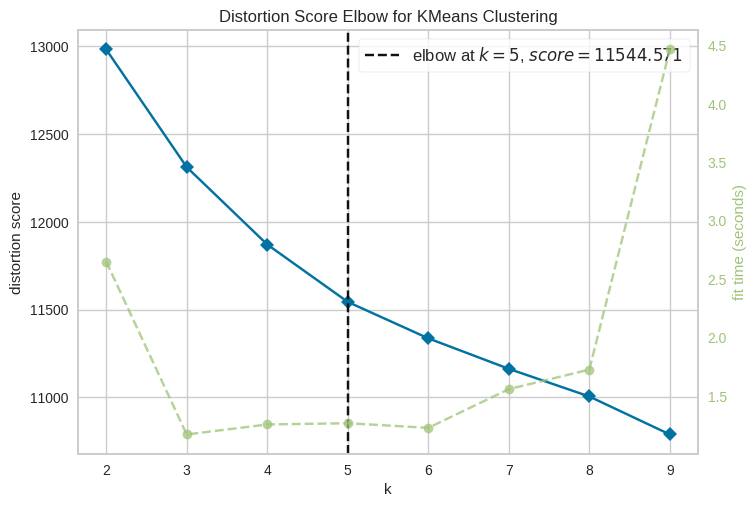

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeansModel = KMeans()
visual = KElbowVisualizer(kmeansModel, k=(2,10))
visual.fit(data_train)
visual.poof()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import silhouette_score

Model = KMeans(n_clusters=5)
k_pred = Model.fit_predict(df1)
data['Clusters'] = k_pred
print("K-means Silhouette Score:", silhouette_score(df1, k_pred))

K-means Silhouette Score: 0.05477858765483051


Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in machine learning.

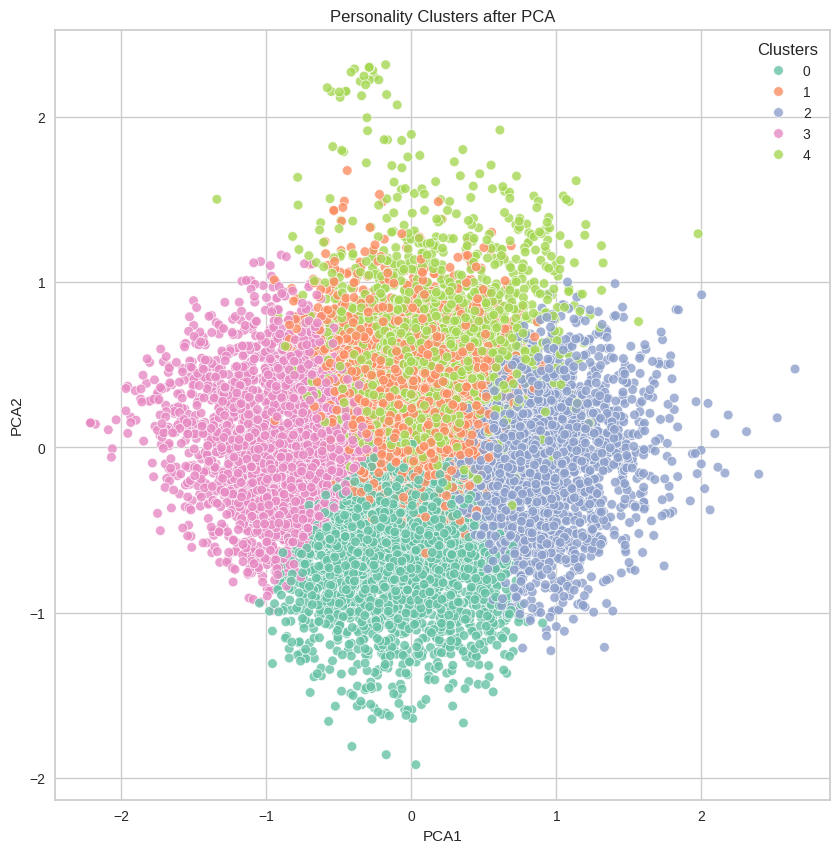

In [ ]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df1)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = k_pred
df_pca.head()

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

In [ ]:
df1['Clusters'] = k_pred
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df1)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = k_pred
df_pca.head()

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

Total cluster count

In [ ]:
df1.Clusters.value_counts()

0    2809
1    2735
3    2623
2    2530
4    2073
Name: Clusters, dtype: int64

Correlation Map

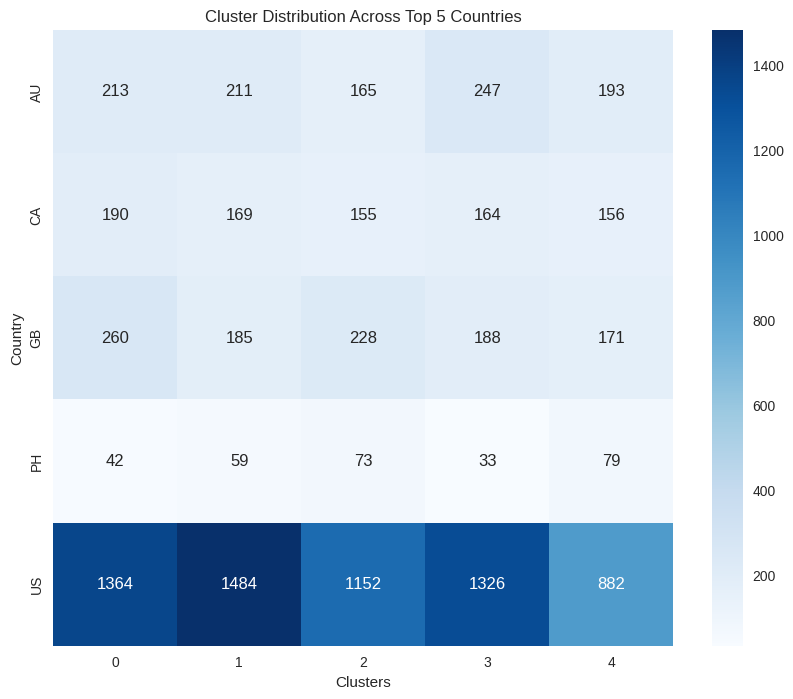

In [ ]:
merged_data = pd.concat([data['Clusters'], df['country']], axis=1)
top_countries = merged_data['country'].value_counts().nlargest(5).index
merged_data_top10 = merged_data[merged_data['country'].isin(top_countries)]
cluster_distribution_top5 = merged_data_top10.groupby(['country', 'Clusters']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(cluster_distribution_top5, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Clusters')
plt.ylabel('Country')
plt.title('Cluster Distribution Across Top 5 Countries')
plt.show()


In [ ]:
col_list = list(data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

df2v = pd.DataFrame()
df2v['extroversion'] = data[ext].sum(axis=1)/10
df2v['neurotic'] = data[est].sum(axis=1)/10
df2v['agreeable'] = data[agr].sum(axis=1)/10
df2v['conscientious'] = data[csn].sum(axis=1)/10
df2v['open'] = data[opn].sum(axis=1)/10
df2v['Clusters'] = k_pred
df2v.groupby('Clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
Clusters,,,,,
0,3.090424,3.468209,3.307547,3.211428,3.349448
1,3.077294,2.959854,3.187020,3.144753,3.204314
2,3.001304,3.627866,3.141858,3.156482,3.231700
3,3.087343,2.462981,3.220435,3.111895,3.312581
4,2.943512,2.599325,2.889870,2.902943,3.084370


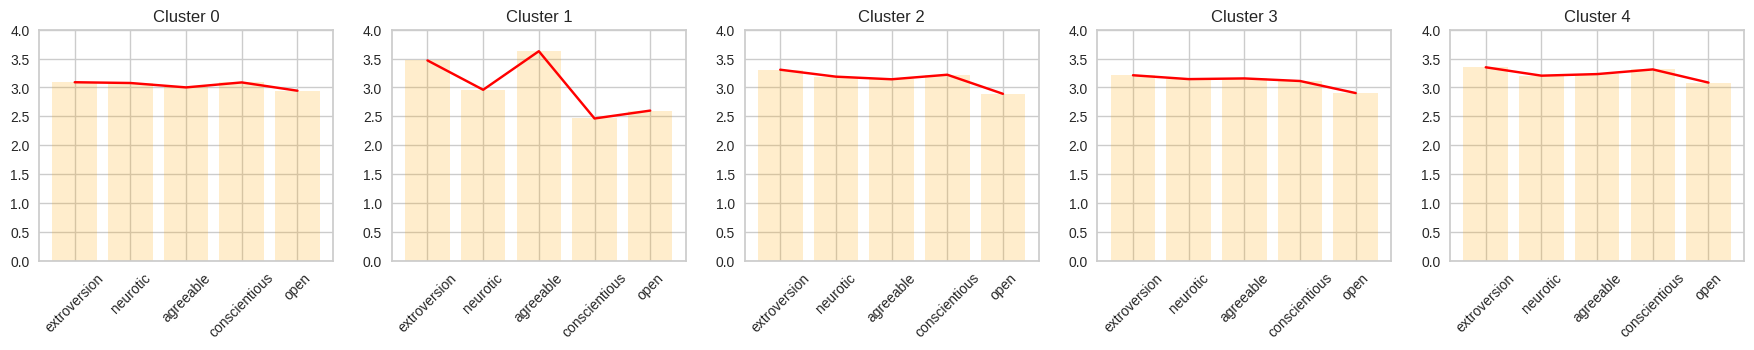

In [ ]:
dclusters = df2v.groupby('Clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dclusters.columns, dclusters.iloc[:, i], color='orange', alpha=0.2)
    plt.plot(dclusters.columns, dclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

From the clusters mean scores formed

Neural Network

In [ ]:
X = df1.drop('Clusters', axis=1)
y = df1['Clusters']

y_categorical = to_categorical(y, num_classes=5)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes))
print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))


Epoch 1/10
256/256 [==============================] - 2s 3ms/step - loss: 0.4176 - accuracy: 0.8566 - val_loss: 0.1596 - val_accuracy: 0.9437
Epoch 2/10
256/256 [==============================] - 1s 2ms/step - loss: 0.1316 - accuracy: 0.9517 - val_loss: 0.1205 - val_accuracy: 0.9560
Epoch 3/10
256/256 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.9676 - val_loss: 0.0912 - val_accuracy: 0.9643
Epoch 4/10
256/256 [==============================] - 1s 4ms/step - loss: 0.0715 - accuracy: 0.9750 - val_loss: 0.0880 - val_accuracy: 0.9623
Epoch 5/10
256/256 [==============================] - 1s 5ms/step - loss: 0.0559 - accuracy: 0.9823 - val_loss: 0.0797 - val_accuracy: 0.9623
Epoch 6/10
256/256 [==============================] - 1s 3ms/step - loss: 0.0430 - accuracy: 0.9876 - val_loss: 0.0765 - val_accuracy: 0.9697
Epoch 7/10
256/256 [==============================] - 1s 3ms/step - loss: 0.0386 - accuracy: 0.9880 - val_loss: 0.0931 - val_accuracy: 0.9614
Epoch 

Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg_model = LogisticRegression(max_iter=400)

cv_scores = cross_val_score(logreg_model, X_train, y_train, cv=5, scoring='accuracy')

logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

print("Classification Report:")
print(classification_report(y_test, y_pred))

Cross-Validation Scores: [0.98238748 0.98188938 0.97895252 0.97748409 0.98678414]
Mean Accuracy: 0.9814995215393502
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       542
           1       0.97      0.98      0.98       555
           2       0.99      0.97      0.98       526
           3       0.98      0.99      0.98       528
           4       0.98      0.98      0.98       403

    accuracy                           0.98      2554
   macro avg       0.98      0.98      0.98      2554
weighted avg       0.98      0.98      0.98      2554

